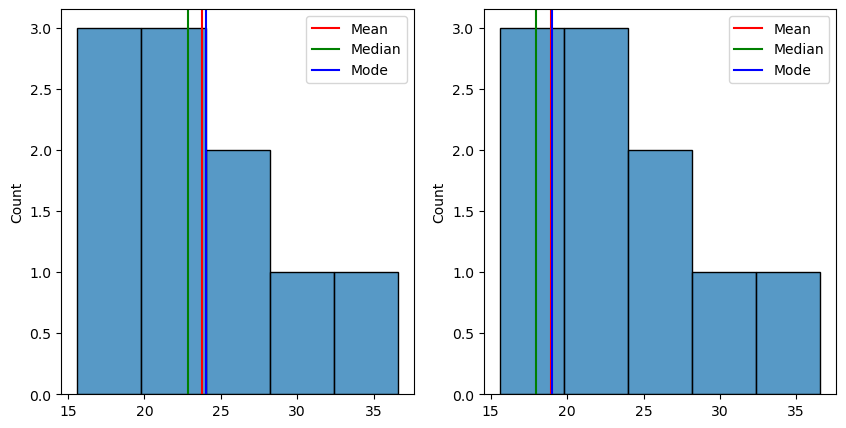

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=np.random.normal(20,5,10)
#print(data)
mean=np.mean(data)
median=np.median(data)
mode=np.round(mean)
#print(f"Mean : {mean}; median : {median}; Mode : {mode}")
#data_skwed=data*5
data_skwed=np.random.normal(20,5,10)
mean_skwed=np.mean(data_skwed)
median_skwed=np.median(data_skwed)
mode_skwed=np.round(mean_skwed)
#print(f"Mean : {mean_skwed}; median : {median_skwed}; Mode : {mode_skwed}")

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(data,ax=ax[0])
ax[0].axvline(mean,color='r',label="Mean")
ax[0].axvline(median,color='g',label="Median")
ax[0].axvline(mode,color='b',label="Mode")
ax[0].legend()

sns.histplot(data,ax=ax[1])
ax[1].axvline(mean_skwed,color='r',label='Mean')
ax[1].axvline(median_skwed,color='g',label='Median')
ax[1].axvline(mode_skwed,color='b',label="Mode")
ax[1].legend()
plt.show()


                  Date    Open     High      Low    Last    Close  \
Date                                                                
2010-01-04  2010-01-04  1121.0  1151.00  1121.00  1134.0  1135.60   
2010-01-05  2010-01-05  1146.8  1149.00  1128.75  1135.0  1134.60   
2010-01-06  2010-01-06  1140.0  1164.25  1130.05  1137.0  1139.60   
2010-01-07  2010-01-07  1142.0  1159.40  1119.20  1141.0  1144.15   
2010-01-08  2010-01-08  1156.0  1172.00  1140.00  1141.2  1144.05   

            Total Trade Quantity  Turnover (Lacs)  
Date                                               
2010-01-04              101651.0          1157.18  
2010-01-05               59504.0           676.47  
2010-01-06              128908.0          1482.84  
2010-01-07              117871.0          1352.98  
2010-01-08              170063.0          1971.42  
                  Date     Open     High      Low    Last    Close  \
Date                                                                 
2010-01-04  

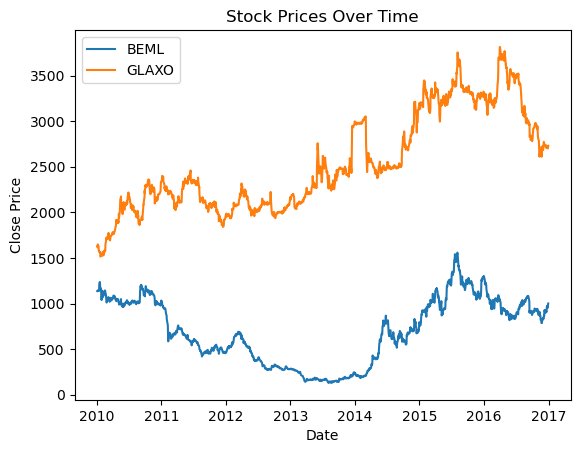

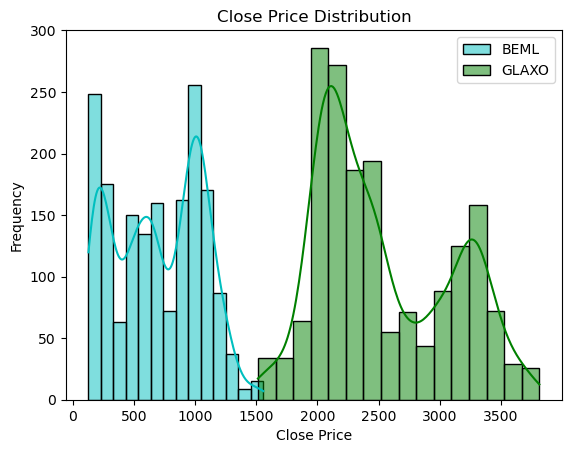

                  Date    Open     High      Low    Last    Close  \
Date                                                                
2010-01-04  2010-01-04  1121.0  1151.00  1121.00  1134.0  1135.60   
2010-01-05  2010-01-05  1146.8  1149.00  1128.75  1135.0  1134.60   
2010-01-06  2010-01-06  1140.0  1164.25  1130.05  1137.0  1139.60   
2010-01-07  2010-01-07  1142.0  1159.40  1119.20  1141.0  1144.15   
2010-01-08  2010-01-08  1156.0  1172.00  1140.00  1141.2  1144.05   

            Total Trade Quantity  Turnover (Lacs)      gain  
Date                                                         
2010-01-04              101651.0          1157.18  0.000000  
2010-01-05               59504.0           676.47 -0.000881  
2010-01-06              128908.0          1482.84  0.004407  
2010-01-07              117871.0          1352.98  0.003993  
2010-01-08              170063.0          1971.42 -0.000087  
                  Date     Open     High      Low    Last    Close  \
Date        

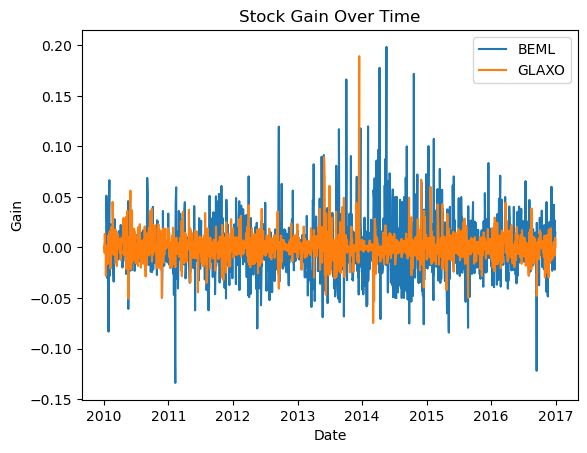

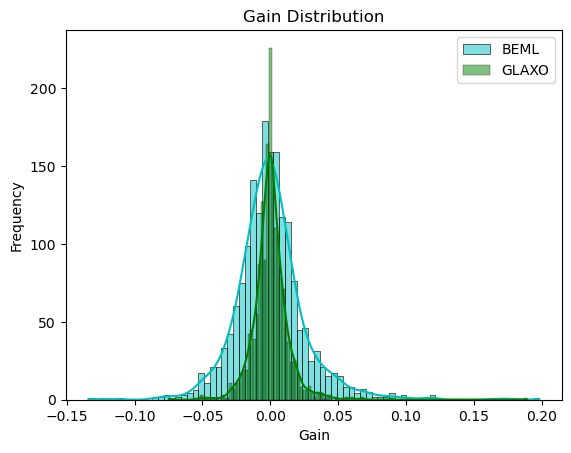

BEML stock is at higher risk.


In [31]:

'''
1. Inorder to examine the stock we are taking normal distribution method
#2. load data from stock-1 and display 5 samples of if
#3. load data from stock-2 and display 5 samples of it
4. To do task of examination , parameter need to be considered . This is example of bivarient sampling
#5. Converting date parameter of both stocks into index so that we can easily plot time plot and histogram plot
#6. Make time plot for both stocks
7. make more into examination
#8. Display few sqamples and calculate gain of close price
#9. It is observed that due to differential nature of formula the gain column contain few missing entries.
10. Plot gain gainst time of both stocks
11. Plot frequency time of both stocks using normal distribution
12.Find mean and StdDev of both stocks and make conclusion which stock is at higher risk by seeing the variance value.
'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

beml = pd.read_csv("BEML.csv")
glaxo = pd.read_csv("GLAXO.csv")
beml = beml.set_index(pd.DatetimeIndex(beml["Date"]))
glaxo = glaxo.set_index(pd.DatetimeIndex(glaxo["Date"]))
print(beml.head())
print(glaxo.head())

plt.plot(beml["Close"], label="BEML")
plt.plot(glaxo["Close"], label="GLAXO")
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

sns.histplot(beml["Close"], color='c', label='BEML', kde=True)
sns.histplot(glaxo["Close"], color='g', label='GLAXO', kde=True)
plt.title('Close Price Distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


beml["gain"] = beml["Close"].pct_change(periods=1)
glaxo["gain"] = glaxo["Close"].pct_change(periods=1)
beml["gain"].fillna(0, inplace=True)
glaxo["gain"].fillna(0, inplace=True)
print(beml.head())
print(glaxo.head())
plt.plot(beml["gain"], label="BEML")
plt.plot(glaxo["gain"], label="GLAXO")
plt.title('Stock Gain Over Time')
plt.xlabel('Date')
plt.ylabel('Gain')
plt.legend()
plt.show()

sns.histplot(beml["gain"], color='c', label='BEML', kde=True)
sns.histplot(glaxo["gain"], color='g', label='GLAXO', kde=True)
plt.title('Gain Distribution')
plt.xlabel('Gain')
plt.ylabel('Frequency')
plt.legend()
plt.show()

beml_mean = beml["gain"].mean()
beml_std = beml["gain"].std()
glaxo_mean = glaxo["gain"].mean()
glaxo_std = glaxo["gain"].std()


if beml["gain"].std() > glaxo["gain"].std():
    print("BEML stock is at higher risk.")
else:
    print("GLAXO stock is at higher risk.")